<a href="https://colab.research.google.com/github/Mateorovere/Wine_Data_Analysis/blob/main/TrabajoPracticoProg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP PROGRAMACION 2:


In [ ]:

#preguntas a responder:

# De cada pais/provincia cual es el tipo de uva que mas se produce?
# Cómo fueron evolucionando los vinos de las regiones de Argentina?

In [ ]:
import pandas as pd
import numpy as np
import re
df1 = pd.read_csv('winemag-data_first150k.csv')
df2 = pd.read_csv('winemag-data-130k-v2.csv')
df = pd.concat([df1,df2], join='outer')
df.drop(['Unnamed: 0','taster_twitter_handle','taster_name','title'], inplace = True,axis = 1)
df.reset_index(inplace=True,drop=True)
df.drop_duplicates(keep='first',inplace= True)
pd.set_option("display.max_columns", 500)

df.head(1)

###Que paises tienen mas vinos reseñados? TOP 10

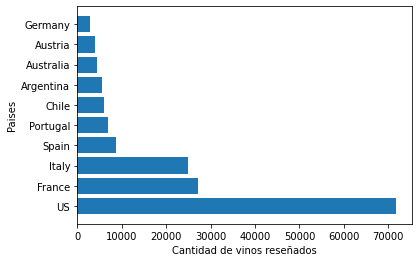

In [ ]:
import matplotlib.pyplot as plt
mas_vinos = df.groupby(['country']).size().sort_values(ascending = False).head(10)
cant = mas_vinos.tolist() 
paises = mas_vinos.index.tolist()
plt.barh(paises,cant)
plt.xlabel("Cantidad de vinos reseñados")
plt.ylabel("Paises")
plt.show()


# De donde vienen los mejores vinos?
Para responder a esta pregunta, podemos preguntarnos: ¿Cuáles tienen mejor puntaje? ¿Cuáles tienen una mejor relación calidad-precio?

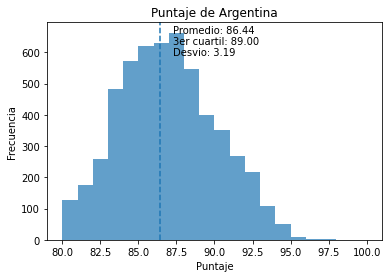

In [ ]:
# Visualisemos las funciones de distribución de densidad
def see_country_points(country):
  filter = df['country'] == country
  country_points = df[filter]['points']
  bins_points = list(range(80,101,1))
  plt.hist(country_points, bins_points, alpha=0.7)
  plt.xlabel('Puntaje')
  plt.ylabel('Frecuencia')
  plt.title('Puntaje de ' + country)
  plt.axvline(country_points.mean(), linestyle='dashed')
  min_y, max_y = plt.ylim()
  tercer_cuartil = country_points.quantile(q=0.75)
  desvio_estandar = country_points.std()
  plt.text(country_points.mean()*1.01, max_y*0.95, 'Promedio: {:.2f}'.format(country_points.mean()))
  plt.text(country_points.mean()*1.01, max_y*0.90, '3er cuartil: {:.2f}'.format(tercer_cuartil))
  plt.text(country_points.mean()*1.01, max_y*0.85, 'Desvio: {:.2f}'.format(desvio_estandar))
see_country_points('Argentina')


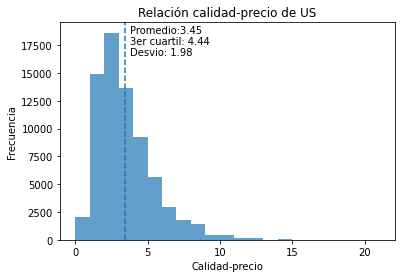

In [ ]:
# Visualizar la relación calidad-precio
def see_country_relation(country):
  filter = df['country'] == country
  df['relation'] = df['points'] / df['price']
  country_relation = df[filter]['relation']
  bins_relation = list(range(int(min(country_relation)), int(max(country_relation)) + 1, 1))
  #bins_relation = np.arange(start=int(min(country_relation)), stop=max(country_relation), step=0.1)
  plt.hist(country_relation, bins_relation, alpha=0.7)
  plt.xlabel('Calidad-precio')
  plt.ylabel('Frecuencia')
  plt.title('Relación calidad-precio de ' + country)
  plt.axvline(country_relation.mean(), linestyle='dashed')
  min_y, max_y = plt.ylim()
  tercer_cuartil = country_relation.quantile(q=0.75)
  desvio_estandar = country_relation.std()
  plt.text(country_relation.mean()*1.1, max_y*0.95, 'Promedio:{:.2f}'.format(country_relation.mean()))
  plt.text(country_relation.mean()*1.1, max_y*0.90, '3er cuartil: {:.2f}'.format(tercer_cuartil))
  plt.text(country_relation.mean()*1.1, max_y*0.85, 'Desvio: {:.2f}'.format(desvio_estandar))
see_country_relation('US')

<ipython-input-124-0b5934d0dc18>:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  country_3quartil = df.groupby('country').quantile(q=0.75).loc[['US','France','Italy','Portugal','Spain','Argentina','Chile']]


<BarContainer object of 7 artists>

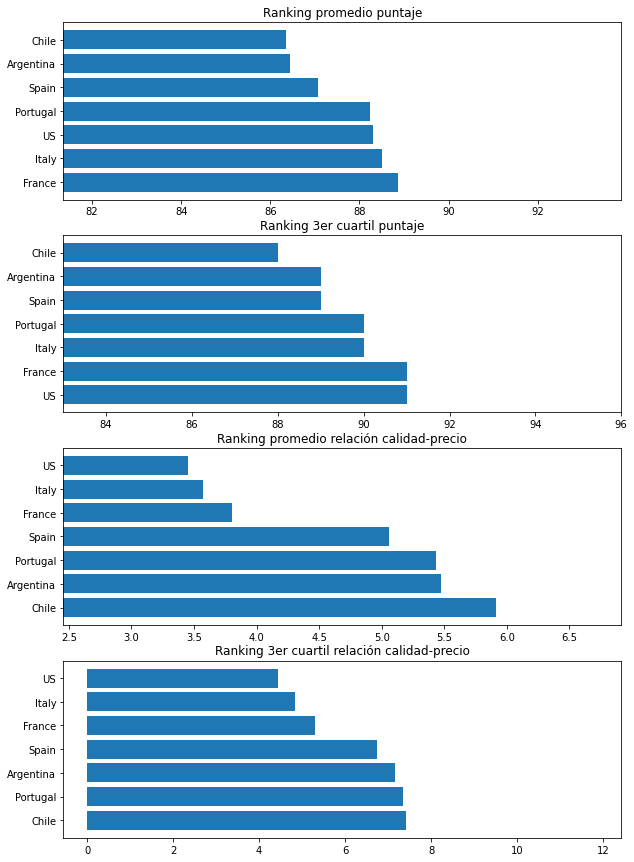

In [ ]:
# Crear una tabla para clasificar a los paises según lo visto en los gráficos
country_mean = df.groupby('country').mean().loc[['US','France','Italy','Portugal','Spain','Argentina','Chile']]
country_3quartil = df.groupby('country').quantile(q=0.75).loc[['US','France','Italy','Portugal','Spain','Argentina','Chile']]

top_points_mean = country_mean['points'].sort_values(ascending=False)
top_points_3quartile = country_3quartil['points'].sort_values(ascending=False)

top_relation_mean = country_mean['relation'].sort_values(ascending=False)
top_relation_3quartile = country_3quartil['relation'].sort_values(ascending=False)


fig, (ax1,ax2,ax3,ax4) = plt.subplots(4)
fig.set_figheight(15)
fig.set_figwidth(10)
ax1.set(xlim=[min(top_points_mean)-5,max(top_points_mean)+5])
ax2.set(xlim=[min(top_points_3quartile)-5,max(top_points_3quartile)+5])
ax3.set(xlim=[min(top_relation_mean)-1,max(top_relation_mean)+1])
ax4.set(xlim=[min(top_relation_3quartile)-5,max(top_relation_3quartile)+5])

ax1.set_title('Ranking promedio puntaje')
ax2.set_title('Ranking 3er cuartil puntaje')
ax3.set_title('Ranking promedio relación calidad-precio')
ax4.set_title('Ranking 3er cuartil relación calidad-precio')


ax1.barh(top_points_mean.index, top_points_mean)
ax2.barh(top_points_3quartile.index, top_points_3quartile)
ax3.barh(top_relation_mean.index, top_relation_mean)
ax4.barh(top_relation_3quartile.index, top_relation_3quartile)


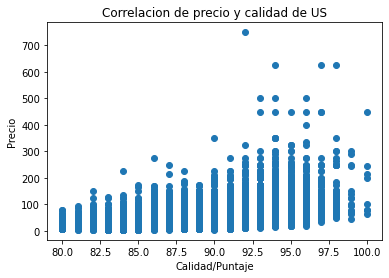

In [ ]:
df.drop([13318], axis=0, inplace=True)  #outlier
def correlacion(country):
  filter = df['country'] == country
  precio = df[filter]['price']
  calidad = df[filter]['points']
  y_axis_relation = precio.tolist()
  x_axis_relation = calidad.tolist()
  plt.scatter(calidad,precio)
  plt.title('Correlacion de precio y calidad de ' + country)
  plt.xlabel('Calidad/Puntaje')
  plt.ylabel('Precio')
correlacion('US')

# Que palabras describen los mejores vinos?

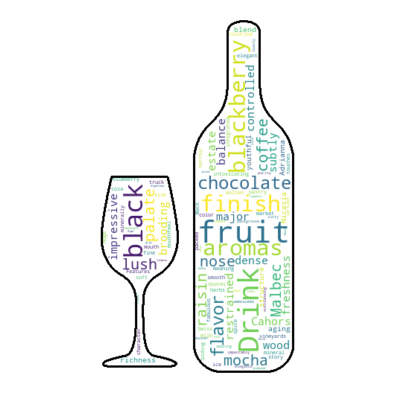

In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
newlist=[]
with open('english.txt') as file:
  stopwordlist = [file.read()]
for word in stopwordlist:
  newlist.extend(word.split('\n'))
newlist.append('wine')
words = []
def desc2wordcloud(variety):
  top = df[(df['points']>95)&(df['variety']==variety)]
  text = " ".join(review for review in top['description'])
  mask = np.array(Image.open('wine_mask.png'))
  transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
  transformed_mask[mask == 0] = 255
  wordcloud = WordCloud(stopwords=newlist,max_words=100,background_color='white', mask=transformed_mask, contour_width=3).generate(text)
  plt.figure(figsize=[10,7])
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()
desc2wordcloud('Malbec')

#De cada pais/provincia cual es el tipo de uva que mas se produce?

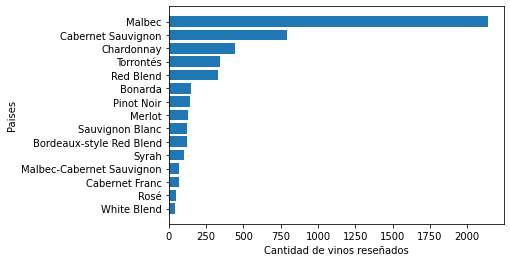

In [ ]:
def most_reviewed_grape(country): # para ver sobre las provincias solo hace falta cambiar donde dice country a province
  filter = df['country'] == country
  grapes = df[filter]['variety'].value_counts(ascending = True).tail(15)
  cant = grapes.tolist() 
  paises = grapes.index.tolist()
  plt.barh(paises,cant)
  plt.xlabel("Cantidad de vinos reseñados")
  plt.ylabel("Paises")
  plt.show()
most_reviewed_grape('Argentina')